# HW3: дедлайн 08.04.2025 23:59

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1 (7 баллов)**

Реализуйте метод Рунге-Кутта 4 порядка для решения ОДУ. Метод должен работать с системами любой размерности.

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B

In [25]:
def runge_kutta(time_steps, y0, system, params=[]):
    time_steps = np.array(time_steps, dtype=float)
    y0 = np.array(y0, dtype=float)
    sol = np.zeros((len(time_steps), y0.shape[0] if y0.ndim > 0 else 1))
    sol[0] = y0

    for i in range(len(time_steps) - 1):
        t = time_steps[i]
        h = time_steps[i + 1] - time_steps[i]
        y = sol[i]

        k1 = np.array(system(t, y, *params))
        k2 = np.array(system(t + h/2, y + h/2 * k1, *params))
        k3 = np.array(system(t + h/2, y + h/2 * k2, *params))
        k4 = np.array(system(t + h, y + h * k3, *params))

        sol[i + 1] = y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

    return sol

**Задание 2 (1 балл)**

С помощью вашей реализацией метода Рунге-Кутта решите систему:

\begin{equation}
\begin{cases}
&2y_2y_1' = y_1^2-y_2^2+1 \\
&y_2' = y_2 + y_1 \\
&y_1(0) = -\frac{3}{4}\\
&y_2(0) = \frac{5}{4}
\end{cases}
\end{equation}



In [26]:
ts = np.linspace(0,2,201)

def system(t, y):
    y1, y2 = y
    dy1_dt = (y1**2 - y2**2 + 1) / (2*y2)
    dy2_dt = y2 + y1
    return [dy1_dt, dy2_dt]

sol = runge_kutta(ts, [-3/4, 5/4], system)

Проверим себя

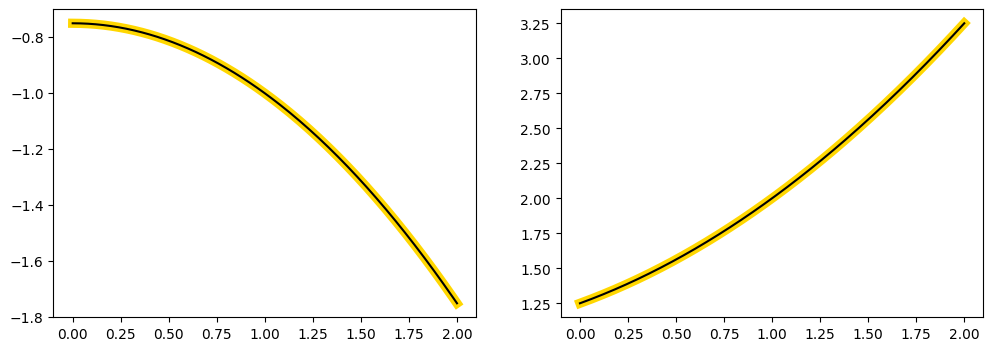

In [27]:
y1_true = lambda t: 1/2 * (t + 1) - 1/4 * (t + 1)**2 - 1
y2_true = lambda t: 1 + 1/4 * (t + 1)**2


fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(ts, y1_true(ts), c='gold', lw=6.66)
axs[0].plot(ts, sol[:, 0], c='black')
axs[1].plot(ts, y2_true(ts), c='gold', lw=6.66)
axs[1].plot(ts, sol[:, 1], c='black')
plt.show()

**Задание 3 (2 балла)**

С помощью вашей реализацией метода Рунге-Кутта решите уравнение:


$$
\begin{cases}
&y'''(t) - y''(t) - y'(t) + y(t) = 3e^t + 5t\sin(t)\\
&y(0) = 23/8,\quad y'(0) = -3/8,\quad y''(0) = 3/8
\end{cases}
$$

In [28]:
ts = np.linspace(0,1,101)

def system(t, y):
    y1, y2, y3 = y
    dy1_dt = y2
    dy2_dt = y3
    dy3_dt = y3 + y2 - y1 + 3*np.exp(t) + 5*t*np.sin(t)

    return [dy1_dt, dy2_dt, dy3_dt]

sol = runge_kutta(ts, [23/8, -3/8, 3/8], system)

Проверим себя

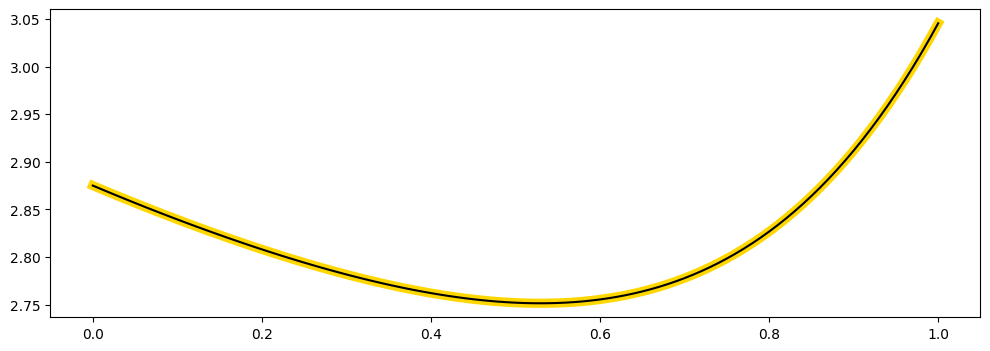

In [29]:
y_true = lambda t: 1/8*(3 * np.exp(t) - 6*np.exp(t)*t + 6*np.exp(t)*t**2 + 20*np.cos(t) + 10*t*np.cos(t) - 10*np.sin(t) + 10*t*np.sin(t))

fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(ts, y_true(ts), c='gold', lw=6.66)
ax.plot(ts, sol[:, 0], c='black')
plt.show()